### Regression Exercise 
# Moneyball The NBA

##### Import Our Libraries

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse



# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

# First we are using 'NBA_test.csv' data to Inspect and explore

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/NBA_test.csv')

# DISPLAY THE FIRST 5 ROWS
df.head(20)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2013,Atlanta Hawks,1,44,8032,7999,3084,6644,2378,4743,706,1901,1158,1619,758,2593,2007,664,369,1219
1,2013,Brooklyn Nets,1,49,7944,7798,2942,6544,2314,4784,628,1760,1432,1958,1047,2460,1668,599,391,1206
2,2013,Charlotte Bobcats,0,21,7661,8418,2823,6649,2354,5250,469,1399,1546,2060,917,2389,1587,591,479,1153
3,2013,Chicago Bulls,1,45,7641,7615,2926,6698,2480,5433,446,1265,1343,1738,1026,2514,1886,588,417,1171
4,2013,Cleveland Cavaliers,0,24,7913,8297,2993,6901,2446,5320,547,1581,1380,1826,1004,2359,1694,647,334,1149
5,2013,Dallas Mavericks,0,41,8293,8342,3182,6892,2576,5264,606,1628,1323,1669,767,2670,1906,648,454,1144
6,2013,Denver Nuggets,1,57,8704,8287,3339,6983,2818,5465,521,1518,1505,2148,1092,2601,2002,762,533,1253
7,2013,Detroit Pistons,0,29,7778,8105,2979,6638,2466,5198,513,1440,1307,1870,991,2463,1742,574,400,1241
8,2013,Golden State Warriors,1,47,8296,8223,3130,6840,2472,5208,658,1632,1378,1744,885,2801,1845,567,346,1236
9,2013,Houston Rockets,1,45,8688,8403,3124,6782,2257,4413,867,2369,1573,2087,909,2652,1902,679,359,1348


#### Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe()


,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2013.0,0.500000,40.678571,8061.821429,8072.821429,3051.285714,6736.607143,2460.214286,5090.964286,591.071429,1645.642857,1368.178571,1818.571429,919.964286,2532.678571,1818.821429,640.392857,419.428571,1191.392857
std,0.0,0.509175,13.078265,338.940840,282.198256,108.952201,170.394605,133.085703,347.353858,118.700347,284.668776,167.057332,219.899881,107.620899,120.902487,118.686345,67.871523,73.159100,67.380258
min,2013.0,0.000000,20.000000,7640.000000,7319.000000,2823.000000,6348.000000,2105.000000,4318.000000,382.000000,1107.000000,1004.000000,1359.000000,666.000000,2359.000000,1579.000000,520.000000,294.000000,988.000000
25%,2013.0,0.000000,29.000000,7763.000000,7898.500000,2975.250000,6643.000000,2374.750000,4844.750000,511.500000,1469.250000,1297.750000,1695.000000,882.250000,2451.750000,1736.750000,590.250000,366.500000,1152.000000
50%,2013.0,0.500000,42.000000,8013.500000,8068.500000,3052.500000,6695.500000,2474.000000,5203.000000,584.500000,1608.000000,1357.000000,1786.000000,927.500000,2482.500000,1840.500000,653.500000,408.500000,1201.000000
75%,2013.0,1.000000,50.250000,8293.750000,8288.000000,3126.500000,6892.750000,2539.500000,5335.500000,659.250000,1761.000000,1439.750000,1905.500000,989.500000,2622.000000,1887.000000,686.250000,448.000000,1233.000000
max,2013.0,1.000000,66.000000,8704.000000,8619.000000,3339.000000,7197.000000,2818.000000,5572.000000,891.000000,2371.000000,1819.000000,2289.000000,1092.000000,2801.000000,2058.000000,784.000000,624.000000,1348.000000


#### Check for Nulls.

In [4]:
# Check for Nulls.
df.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

#### Check for Duplicates

In [5]:
# Check for Duplicates
df.duplicated().sum()

0

#### Build a function that will do this for you for any data frame you pass into it.

In [6]:
def inspect_dataframe(input_df):
    print('Describing the data:\n\n',input_df.describe())
    print('\n\n\nNumber of null values:\n',input_df.isnull().sum())
    print('\n\nNumber of duplicated values: ', input_df.duplicated().sum())
    return "That gooood stuff."

inspect_dataframe(df)


Describing the data:

        SeasonEnd   Playoffs          W          PTS       oppPTS           FG  \
count       28.0  28.000000  28.000000    28.000000    28.000000    28.000000   
mean      2013.0   0.500000  40.678571  8061.821429  8072.821429  3051.285714   
std          0.0   0.509175  13.078265   338.940840   282.198256   108.952201   
min       2013.0   0.000000  20.000000  7640.000000  7319.000000  2823.000000   
25%       2013.0   0.000000  29.000000  7763.000000  7898.500000  2975.250000   
50%       2013.0   0.500000  42.000000  8013.500000  8068.500000  3052.500000   
75%       2013.0   1.000000  50.250000  8293.750000  8288.000000  3126.500000   
max       2013.0   1.000000  66.000000  8704.000000  8619.000000  3339.000000   

               FGA           2P          2PA          3P          3PA  \
count    28.000000    28.000000    28.000000   28.000000    28.000000   
mean   6736.607143  2460.214286  5090.964286  591.071429  1645.642857   
std     170.394605   133.085

'That gooood stuff.'

# Now we will use 'inspect_dataframe()' function to inspect and explore 'NBA_train.csv' data

In [7]:
df_train = pd.read_csv('data/NBA_train.csv')

inspect_dataframe(df_train)

Describing the data:

          SeasonEnd    Playoffs           W           PTS        oppPTS  \
count   835.000000  835.000000  835.000000    835.000000    835.000000   
mean   1996.319760    0.574850   41.000000   8370.239521   8370.239521   
std       9.243808    0.494662   12.740822    581.040114    587.543959   
min    1980.000000    0.000000   11.000000   6901.000000   6909.000000   
25%    1989.000000    0.000000   31.000000   7934.000000   7934.000000   
50%    1996.000000    1.000000   42.000000   8312.000000   8365.000000   
75%    2005.000000    1.000000   50.500000   8784.500000   8768.500000   
max    2011.000000    1.000000   72.000000  10371.000000  10723.000000   

                FG          FGA           2P          2PA          3P  \
count   835.000000   835.000000   835.000000   835.000000  835.000000   
mean   3200.367665  6873.318563  2881.324551  5956.444311  319.043114   
std     287.181266   401.027166   446.097941   830.596327  199.698941   
min    2565.000000

'That gooood stuff.'

#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

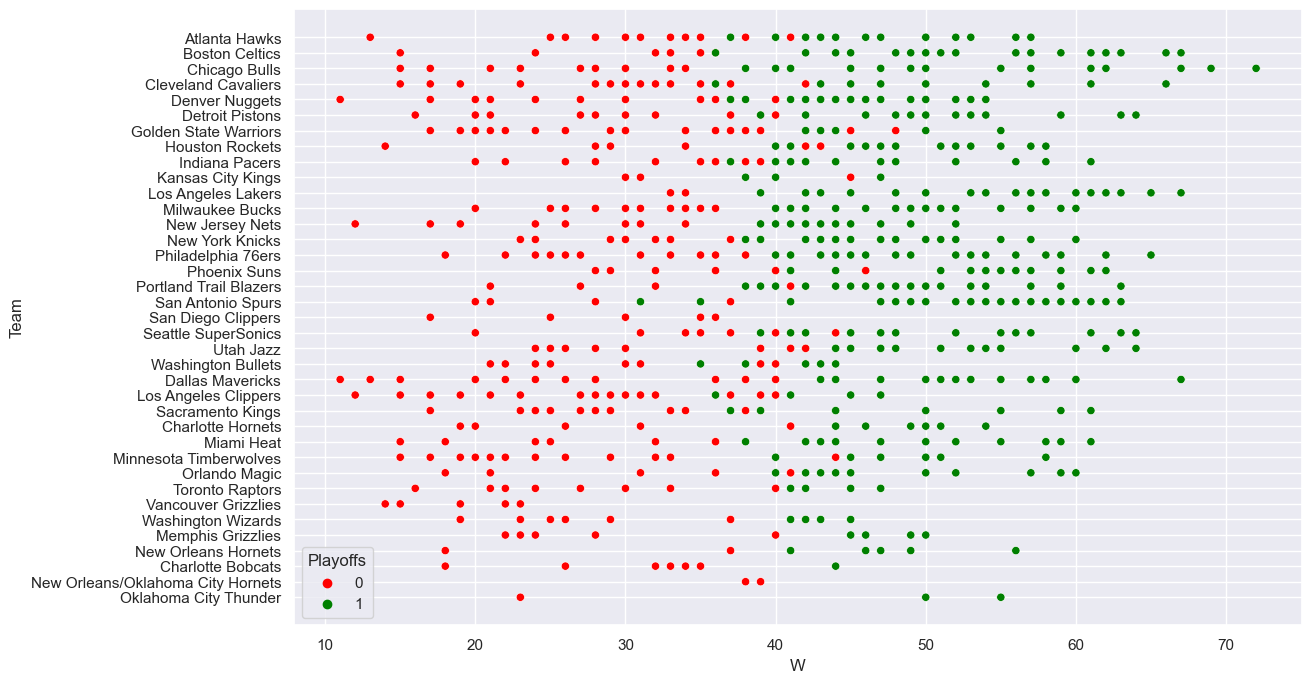

In [8]:
sns.set()
plt.figure(figsize=(13, 8))
colors = {0: 'red', 1: 'green'}
senseOfWin= sns.scatterplot(data= df_train, x='W', y='Team', hue='Playoffs', palette=colors)
# senseOfWin.axvline(x=40, color='red')

**Decribing the plot:** from the above scatter plot we see that roughly 40 wins are reqired to reach playoffs

In [9]:
# The five-number summary of teams that reached playoffs
# df_train[df_train['Playoffs']==1].describe()

**From five-number summary of teams We see mean wins to reach playoffs is 41, So let's assume at least 41 wins required to reach playoffs**

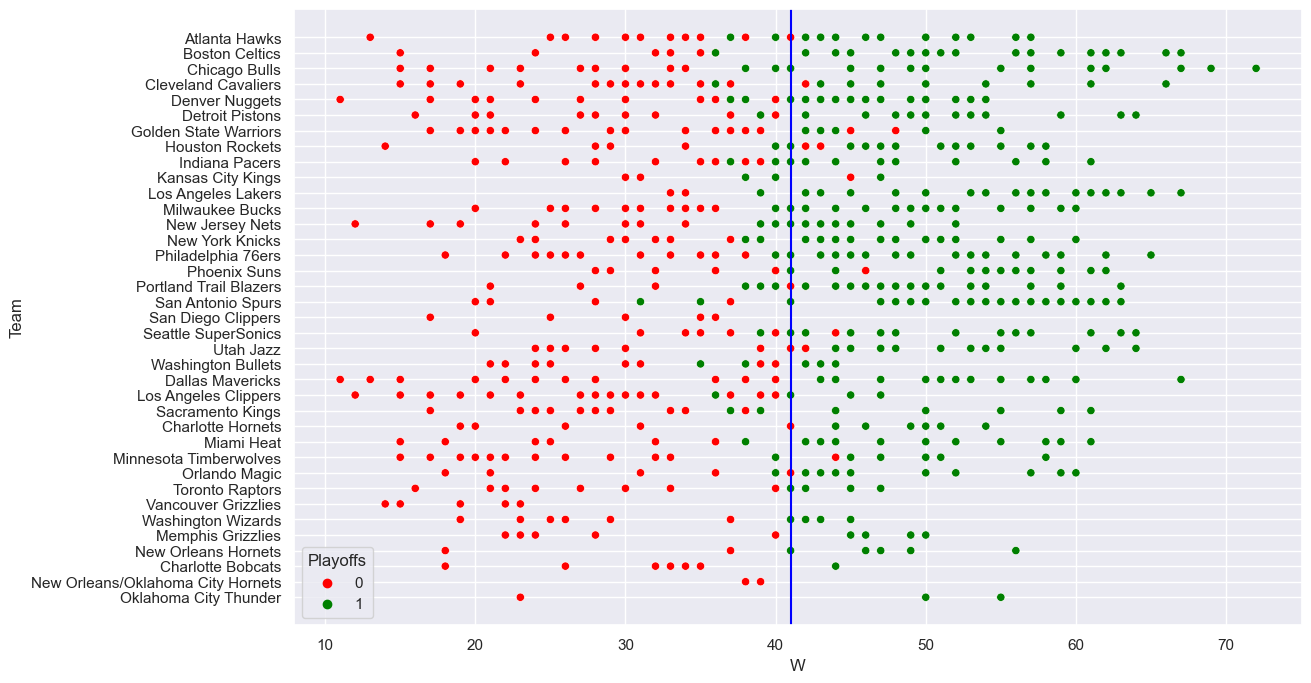

In [10]:
sns.set()
plt.figure(figsize=(13, 8))
colors = {0: 'red', 1: 'green'}
senseOfWin= sns.scatterplot(data= df_train, x='W', y='Team', hue='Playoffs', palette=colors)
senseOfWin.axvline(x=41, color='blue')

#### Take a rough estimate, and now use that moving forward.  



In [11]:
WINS_NEED_TO_MAKE_PLAYOFFS = 41

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

## Score More Point then the opponent to win

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,scores_diff
202,1988,San Antonio Spurs,1,31,9314,9714,3706,7559,3573,7147,...,412,1769,2412,1184,2335,2344,739,468,1418,-400
298,1992,Miami Heat,1,38,8608,8953,3256,7061,2999,6310,...,751,1839,2329,1187,2366,1749,670,373,1377,-345
139,1986,Chicago Bulls,1,30,8962,9274,3476,7227,3388,6910,...,317,1922,2499,1280,2278,2006,609,400,1436,-312
155,1986,Sacramento Kings,1,37,8924,9176,3538,7220,3508,7086,...,134,1818,2338,1135,2377,2304,602,388,1533,-252
113,1984,Washington Bullets,1,35,8423,8660,3344,6907,3273,6625,...,282,1664,2201,1027,2387,2192,556,320,1448,-237
117,1985,Cleveland Cavaliers,1,36,8903,9129,3470,7364,3374,7029,...,335,1867,2491,1203,2445,2096,622,472,1387,-226
415,1996,Sacramento Kings,1,39,8163,8385,2971,6494,2509,5300,...,1194,1759,2407,1114,2345,1829,643,436,1442,-222
21,1980,Washington Bullets,1,39,8773,8982,3574,7796,3501,7558,...,238,1552,2048,1334,2723,2201,530,443,1380,-209
433,1997,Los Angeles Clippers,1,36,7969,8162,2989,6696,2515,5357,...,1339,1517,2074,1092,2242,1662,733,441,1311,-193
167,1987,Golden State Warriors,1,42,9188,9380,3551,7412,3435,7048,...,364,1970,2526,1193,2351,2083,715,321,1354,-192


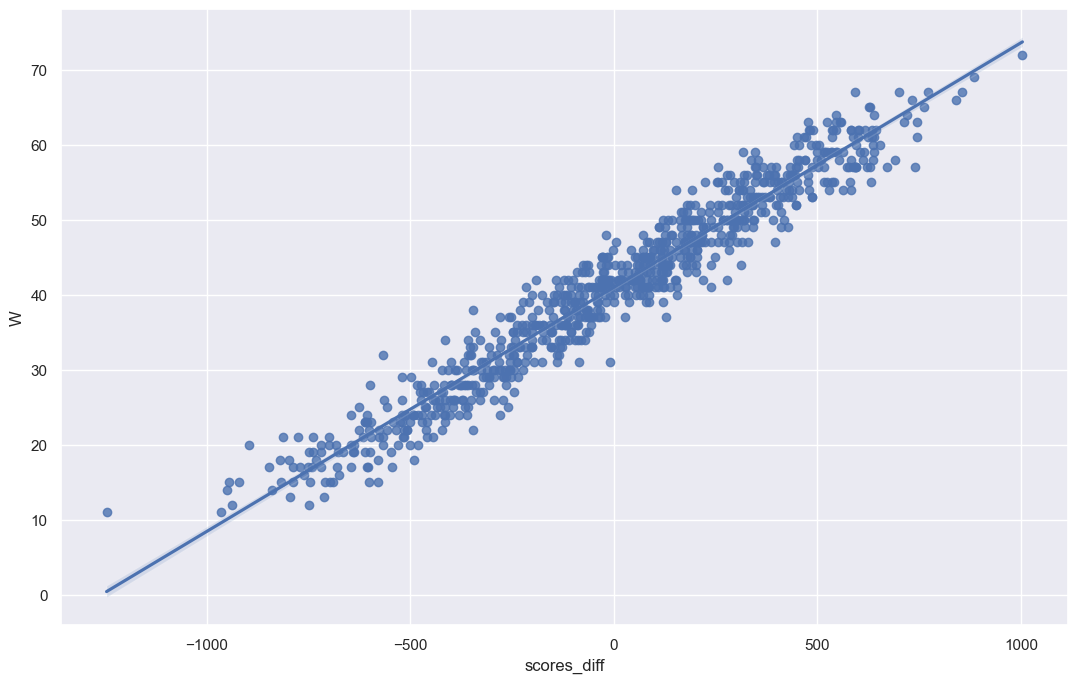

In [12]:
df_train['scores_diff'] = df_train['PTS'] - df_train['oppPTS']

# making plot to see co-relation between 'scores_diff' & 'W'
plt.figure(figsize=(13, 8))
sns.regplot(data= df_train, x='scores_diff', y='W')
df_train[df_train['Playoffs']==1].sort_values(by='scores_diff', ascending=True).head(50)

In [13]:
X= df_train['scores_diff']
y= df_train['W']

X= sm.add_constant(X)

model_wins = sm.OLS(y,X).fit()

y_pred = model_wins.predict(X)

results = model_wins.summary()
print(results)

root_mean_squared_error = rmse(y, y_pred)

print( y.mean(), root_mean_squared_error, ((root_mean_squared_error / y.mean())*100).round(2))

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:02:10   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          41.0000      0.106    387.027      

* Average Wins: 41.0
* RMSE: 3.057
* %off average by: % 7.46

In [14]:
# Making a new y_pred that every row is just the average wins of our data. 
new_y_preds = [y.mean()]*len(y)

# finding the root mean squared of just our naive baseline 'model'
root_mean_squared_error = rmse(y, new_y_preds)

# print that
root_mean_squared_error

12.733190163369388

**12.8426 is much worse than our 3.057 so we can have some intuition that our model is better than just guessing the average.**

## Finding out how many Score diff we need to make 41 wins

In [15]:
coef_y_int = model_wins.params['const']
coef_scores_diff = model_wins.params['scores_diff']

print(coef_y_int, coef_scores_diff)

WINS = 41

# When is scores_diff make WINS >= 44
# coef_y_int + coef_scoress_diff??? >= 44
min_scores_diff = (WINS - coef_y_int) / coef_scores_diff
min_scores_diff

40.99999999999999 0.0325863328211329


2.1804930909540664e-13

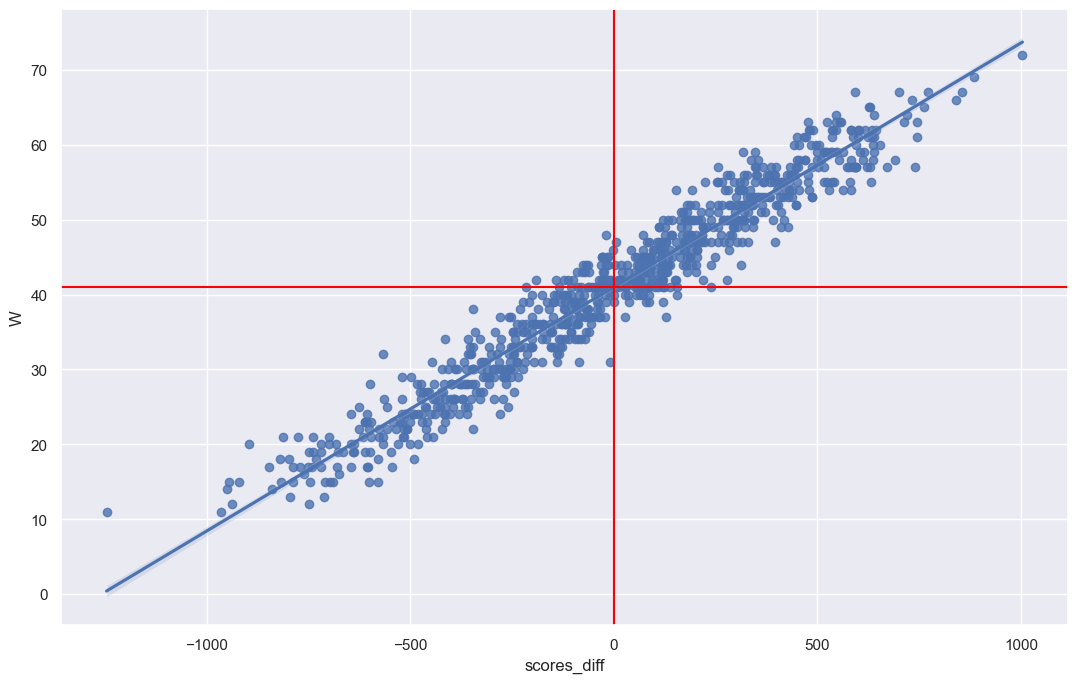

In [16]:
plt.figure(figsize=(13, 8))
ax = sns.regplot(data= df_train, x='scores_diff', y='W')
ax.axvline(x= min_scores_diff, color='red')
ax.axhline(y=WINS, color='red')

# We need to score let's say 1 more points than we allow to win 44 games to make the playoffs. 

## How do we increase scores_diff aka score more runs than we allow?

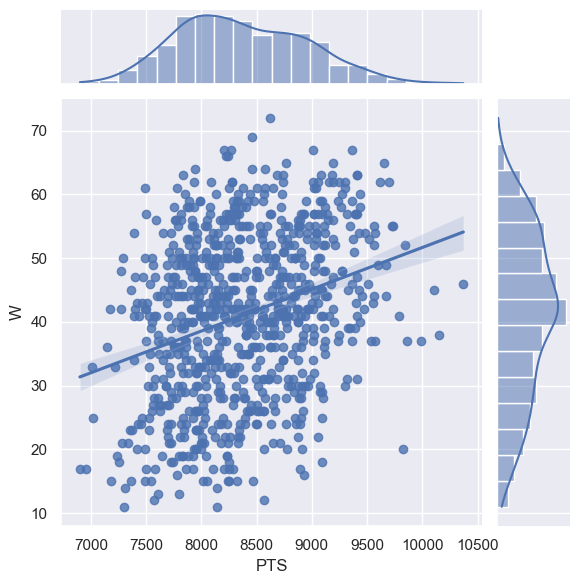

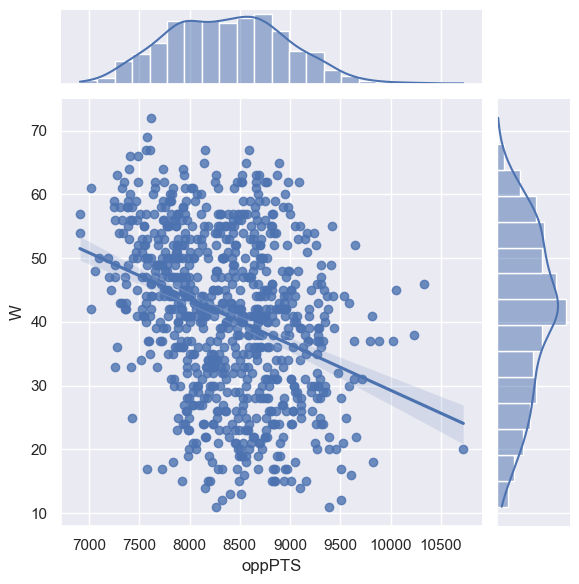

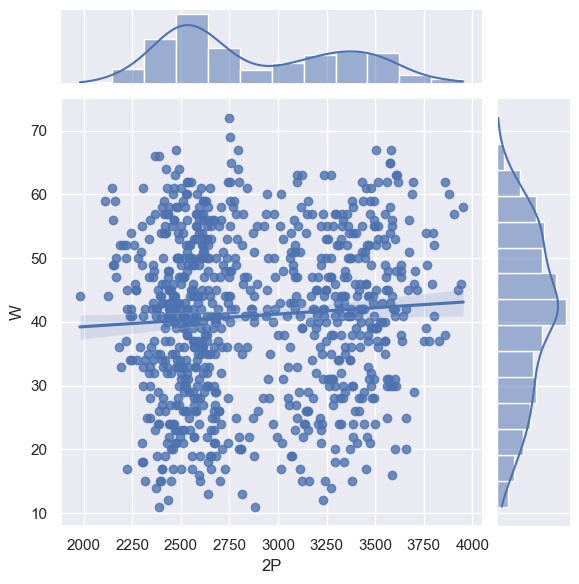

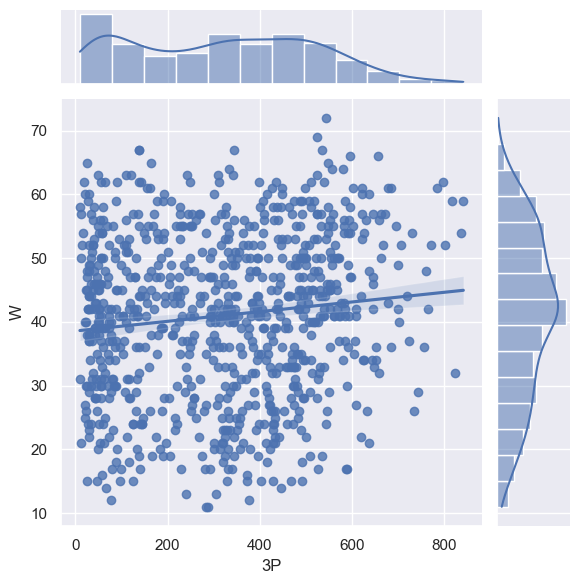

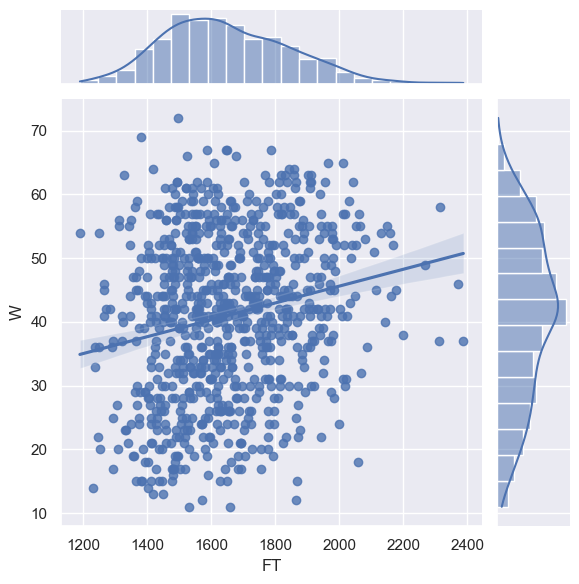

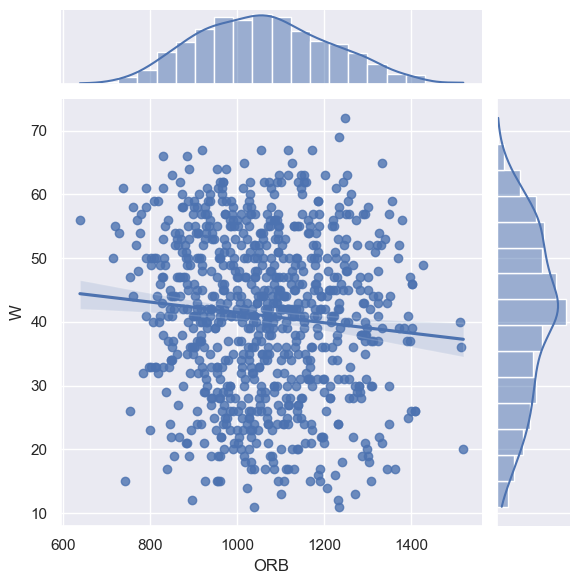

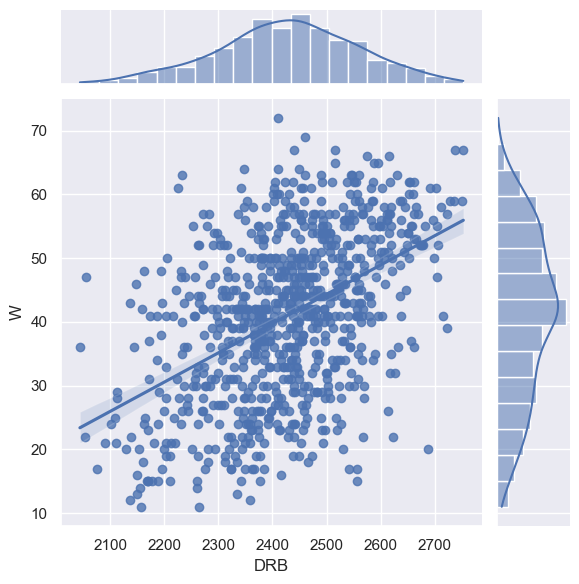

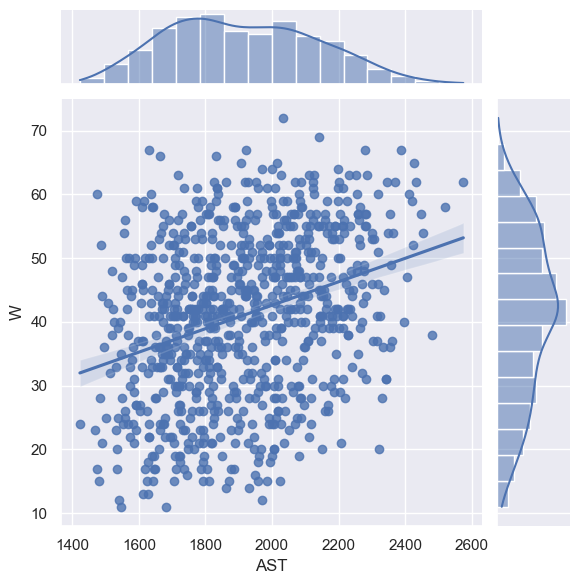

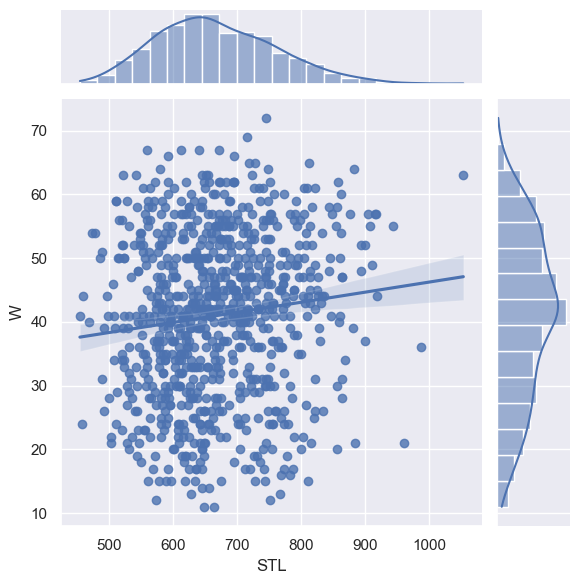

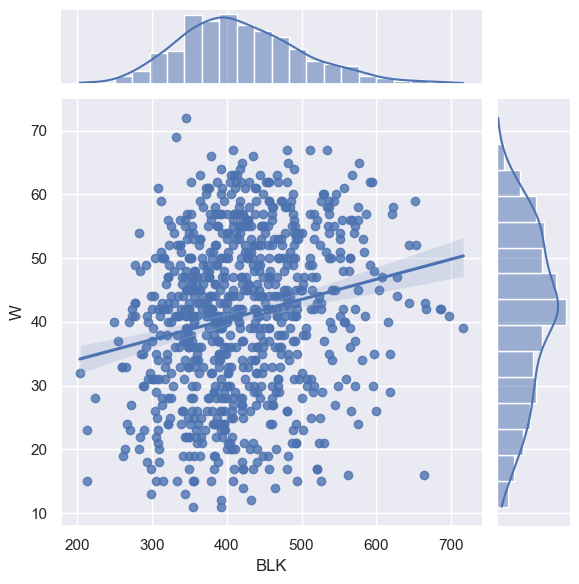

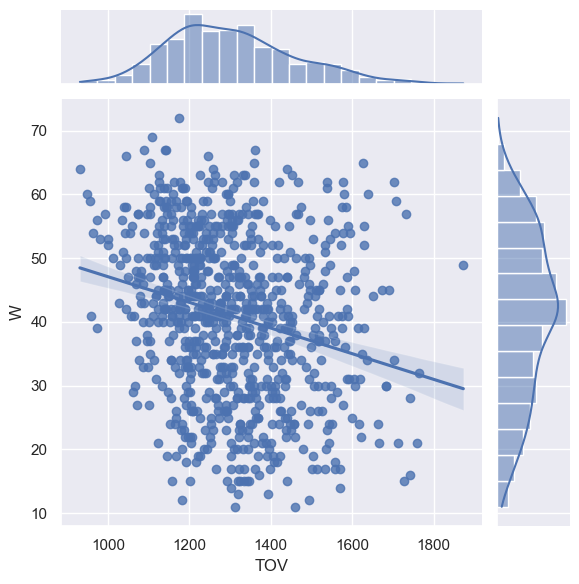

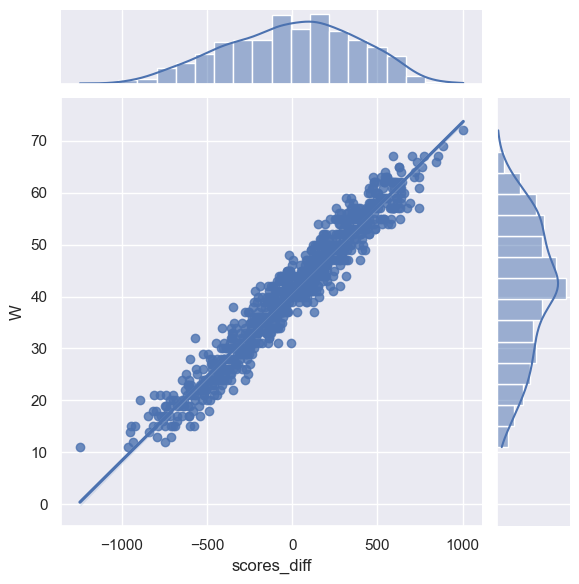

In [17]:
# let's find possible coloumns which are things (or features) acutally the most important when it came to winning.
possible_features = ['PTS','oppPTS','2P','3P','FT','ORB','DRB','AST','STL','BLK','TOV', 'scores_diff']

for ftur in possible_features:
    sns.jointplot(x=ftur, y="W", data=df_train, kind="reg");

# Training to Predict Points Scored

In [18]:
X = df_train[['2P','3P','FT','ORB','AST','STL', 'DRB','BLK','TOV']]
y = df_train['PTS']

print( y.mean() )
X = sm.add_constant(X)

model_points_scored = sm.OLS(y, X).fit()

print(model_points_scored.summary())


y_pred = model_points_scored.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print(root_mean_squared_error)


root_mean_squared_error / y.mean()

8370.239520958085
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.524e+28
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:02:23   Log-Likelihood:                 19058.
No. Observations:                 835   AIC:                        -3.810e+04
Df Residuals:                     825   BIC:                        -3.805e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.095e-13   2.91e-11  

3.538324321017264e-15

In [19]:
# let's remove STL, 'DRB','BLK' & TOV
X = df_train[['2P','3P','FT', 'ORB', 'AST']]
y = df_train['PTS']

X = sm.add_constant(X)


model_points_scored = sm.OLS(y, X).fit()

print(model_points_scored.summary())



                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.587e+30
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:02:23   Log-Likelihood:                 20604.
No. Observations:                 835   AIC:                        -4.120e+04
Df Residuals:                     829   BIC:                        -4.117e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.297e-12   3.03e-12      1.087      0.2

In [20]:
# Sanity check, this should be close zero
model_points_scored.resid.mean()

4.533313711112488e-12

array([[<Axes: title={'center': '2P'}>, <Axes: title={'center': '3P'}>],
       [<Axes: title={'center': 'FT'}>, <Axes: title={'center': 'ORB'}>],
       [<Axes: title={'center': 'AST'}>, <Axes: >]], dtype=object)

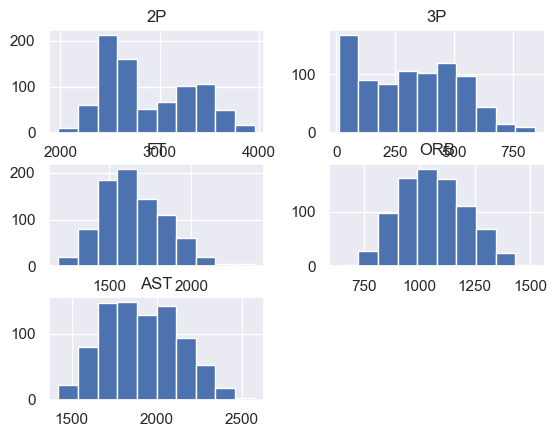

In [21]:
df_train[['2P','3P','FT', 'ORB', 'AST']].hist()

In [22]:
df_train.head(1)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,scores_diff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,...,75,2038,2645,1369,2406,1913,782,539,1495,239


In [23]:
df_train.isnull().sum()

SeasonEnd      0
Team           0
Playoffs       0
W              0
PTS            0
oppPTS         0
FG             0
FGA            0
2P             0
2PA            0
3P             0
3PA            0
FT             0
FTA            0
ORB            0
DRB            0
AST            0
STL            0
BLK            0
TOV            0
scores_diff    0
dtype: int64

In [24]:
# Make a copy of the 
df_train_copy = df_train[['2P','3P','FT', 'ORB', 'AST','PTS']].copy()
df_train_copy = df_train_copy.dropna()
print(df_train_copy.shape)


X = df_train_copy[['2P','3P','FT', 'ORB', 'AST']]
y = df_train_copy['PTS']

X = sm.add_constant(X)

model_allowed_scored = sm.OLS(y, X).fit()
print(model_allowed_scored.summary())

(835, 6)
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.587e+30
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:02:24   Log-Likelihood:                 20604.
No. Observations:                 835   AIC:                        -4.120e+04
Df Residuals:                     829   BIC:                        -4.117e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.297e-12   3.03e-12      1.087

# Training to Predict Points Considered

In [25]:
X = df_train[['FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'STL', 'BLK', 'TOV']]
y = df_train['oppPTS']

print( y.mean() )
X = sm.add_constant(X)

model_points_considered = sm.OLS(y, X).fit()

print(model_points_considered.summary())


y_pred = model_points_considered.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print(root_mean_squared_error)


root_mean_squared_error / y.mean()

8370.239520958085
                            OLS Regression Results                            
Dep. Variable:                 oppPTS   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     977.3
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:02:24   Log-Likelihood:                -5404.6
No. Observations:                 835   AIC:                         1.083e+04
Df Residuals:                     823   BIC:                         1.089e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        470.4616    184.040  

0.018707146022633146

In [26]:
# let's remove 'STL', 'DRB'
# X = df_train[['ORB', 'BLK', 'TOV']]
# X = df_train[['FGA', 'TOV']]
X = df_train[['2P', '3P', 'FT', 'DRB', 'AST', 'STL', 'BLK', 'TOV']]

y = df_train['oppPTS']

X = sm.add_constant(X)


model_points_considered = sm.OLS(y, X).fit()

print(model_points_considered.summary())



                            OLS Regression Results                            
Dep. Variable:                 oppPTS   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     438.9
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          2.24e-291
Time:                        23:02:24   Log-Likelihood:                -5815.9
No. Observations:                 835   AIC:                         1.165e+04
Df Residuals:                     826   BIC:                         1.169e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4216.6221    242.514     17.387      0.0

In [27]:
# Sanity check, this should be close zero
model_points_considered.resid.mean()

3.648870959208754e-13

array([[<Axes: title={'center': 'ORB'}>, <Axes: title={'center': 'BLK'}>],
       [<Axes: title={'center': 'TOV'}>, <Axes: >]], dtype=object)

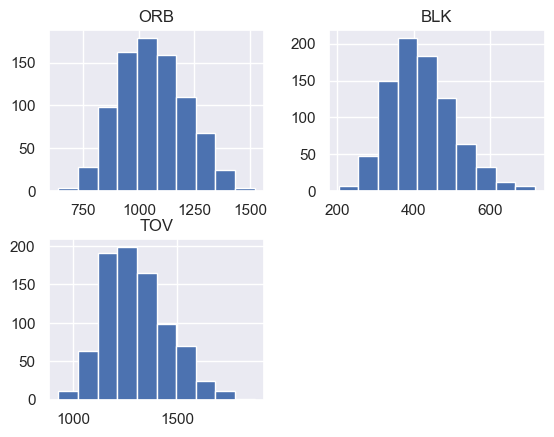

In [28]:
df_train[['ORB', 'BLK', 'TOV']].hist()

In [29]:
df_train.head(1)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,scores_diff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,...,75,2038,2645,1369,2406,1913,782,539,1495,239


In [30]:
df_train.isnull().sum()

SeasonEnd      0
Team           0
Playoffs       0
W              0
PTS            0
oppPTS         0
FG             0
FGA            0
2P             0
2PA            0
3P             0
3PA            0
FT             0
FTA            0
ORB            0
DRB            0
AST            0
STL            0
BLK            0
TOV            0
scores_diff    0
dtype: int64

In [31]:
# Make a copy of the 
df_train_copy = df_train[['2P', '3P', 'FT', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'oppPTS']].copy()

df_train_copy = df_train_copy.dropna()
print(df_train_copy.shape)


X = df_train_copy[['2P', '3P', 'FT', 'DRB', 'AST', 'STL', 'BLK', 'TOV']]
y = df_train_copy['oppPTS']

X = sm.add_constant(X)

model_allowed_scored = sm.OLS(y, X).fit()
print(model_allowed_scored.summary())

(835, 9)
                            OLS Regression Results                            
Dep. Variable:                 oppPTS   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     438.9
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          2.24e-291
Time:                        23:02:25   Log-Likelihood:                -5815.9
No. Observations:                 835   AIC:                         1.165e+04
Df Residuals:                     826   BIC:                         1.169e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4216.6221    242.514     17.387

## Predicting Points scored by Team

In [32]:
df_test = pd.read_csv('data/NBA_test.csv')
df_Atlanta_Hawks = df_test[ df_test['Team'] == 'Sacramento Kings' ].copy()
df_Atlanta_Hawks['const'] = 1
df_Atlanta_Hawks

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,const
23,2013,Sacramento Kings,0,28,8219,8619,3086,6904,2476,5223,...,1681,1437,1869,943,2385,1708,671,342,1199,1


In [33]:
prediction_features = df_Atlanta_Hawks[['const','2P', '3P', 'FT', 'ORB', 'AST']]

prediction_features = sm.add_constant(prediction_features)

PTS_2013 = model_points_scored.predict(prediction_features)
predicted_points_scored = PTS_2013.values[0]
print('Predicted points scored for Atlanta Hawks in 2013:', predicted_points_scored)




Predicted points scored for Atlanta Hawks in 2013: 8218.999999999995


## Predicting Points considered by Team

In [34]:
df_test = pd.read_csv('data/NBA_test.csv')
df_Atlanta_Hawks = df_test[ df_test['Team'] == 'Houston Rockets' ].copy()
df_Atlanta_Hawks['const'] = 1
df_Atlanta_Hawks

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,const
9,2013,Houston Rockets,1,45,8688,8403,3124,6782,2257,4413,...,2369,1573,2087,909,2652,1902,679,359,1348,1


In [35]:
# prediction_features = df_Atlanta_Hawks[['const','FGA', 'TOV']]

prediction_features = df_Atlanta_Hawks[['const','2P', '3P', 'FT', 'DRB', 'AST', 'STL', 'BLK', 'TOV']]
prediction_features = sm.add_constant(prediction_features)

PTS_2013 = model_points_considered.predict(prediction_features)
predicted_points_considered = PTS_2013.values[0]
print('Predicted points considered for Atlanta Hawks in 2013:', predicted_points_considered)



Predicted points considered for Atlanta Hawks in 2013: 8362.941579205128


In [38]:
df_train.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,scores_diff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,...,75,2038,2645,1369,2406,1913,782,539,1495,239
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,...,422,1907,2449,1227,2457,2198,809,308,1539,639
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,...,275,2019,2592,1115,2465,2152,704,392,1684,-222
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,...,187,1702,2205,1307,2381,2108,764,342,1370,28
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,...,255,1871,2539,1311,2524,2079,746,404,1533,-362


In [89]:
# # Sanity check, this should be close zero
# model_points_considered.resid.mean()

## Playoff prediction for teams

In [100]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Training model for playoff detection
X_train = df_train[['PTS', 'oppPTS', 'W']]
y_train = df_train['Playoffs']

X_train = sm.add_constant(X_train)

model_playoff = sm.Logit(y_train, X_train).fit()

# Print the summary of the logistic regression model
print(model_playoff.summary())


# # Predicting playoffs for one team
# --------
# df_test = pd.read_csv('data/NBA_test.csv')
# df_test_team = df_test[df_test['Team'] == 'Miami Heat'].copy()
# df_test_team['scores_diff'] = df_test_team['PTS'] - df_test_team['oppPTS']
# --------

# predicting playoff for whole dataset
# --------
df_test_team = pd.read_csv('data/NBA_test.csv')
# --------

df_test_team['const'] = 1

# print('\n\n\n')
# print(df_test_team)
# print('\n\n\n')


# Prediction features
prediction_features = df_test_team[['const','PTS', 'oppPTS', 'W']]
prediction_features = sm.add_constant(prediction_features)

# Predict probabilities
playoffs_probabilities = model_playoff.predict(prediction_features)

# predicted_playoffs = playoffs_probabilities.values[0]

# Set a threshold for classification (e.g., 0.5)
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (playoffs_probabilities >= threshold).astype(int)

# Add binary predictions to the test data
df_test['Playoff_Prediction'] = binary_predictions

# Print the result
print(df_test[['Team', 'PTS', 'oppPTS', 'W', 'Playoff_Prediction']])

# # Print the binary prediction
# print(f"playoff prediction for the selected team in 2013: {binary_predictions.values[0]}")


Optimization terminated successfully.
         Current function value: 0.179708
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Playoffs   No. Observations:                  835
Model:                          Logit   Df Residuals:                      831
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.7365
Time:                        00:48:47   Log-Likelihood:                -150.06
converged:                       True   LL-Null:                       -569.39
Covariance Type:            nonrobust   LLR p-value:                1.784e-181
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.6561      3.682     -6.697      0.000     -31.872     -17.440
PTS            0.0011      0.

## Evaluating my model

Accuracy: 0.8929
Precision: 0.8667
Recall: 0.9286
F1 Score: 0.8966


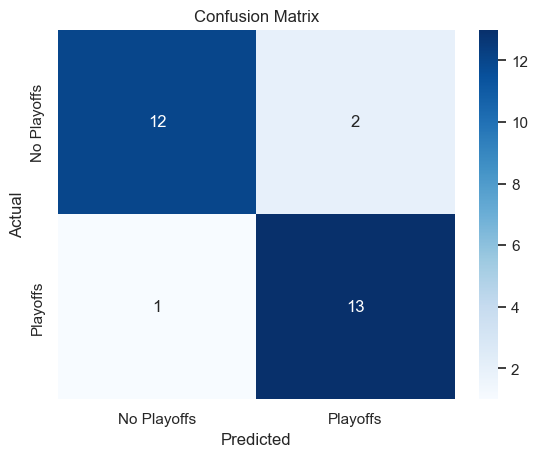

In [101]:

# Assuming y_true is the true playoff values for the test data
y_true = df_test_team['Playoffs']

# Calculate metrics
accuracy = accuracy_score(y_true, binary_predictions)
precision = precision_score(y_true, binary_predictions)
recall = recall_score(y_true, binary_predictions)
f1 = f1_score(y_true, binary_predictions)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, binary_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No Playoffs', 'Playoffs'], yticklabels=['No Playoffs', 'Playoffs'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
